# Midterm file revamp - parks analysis
I'm cleaning up my MidtermPrep notebook, so this one only includes the exploration of the parks dataset itself. It does not include anything related to income (static maps or folium).

## Dataset info

**(geo)dataframes:** (so I can keep track of them all)
- tracts: initial geojson from **[LA County Open Source GIS page](https://egis-lacounty.hub.arcgis.com/datasets/339787e096f94c2dbfbf1909698d6c5c/explore)**
- district: initial CSV from **[LA County Census Tracts Viewer page](https://www.arcgis.com/apps/dashboards/e928d021b4d74e5ab4537fac43a3eaf5)**
- d2d5: subset of district, only has District 2 and District 5
- tracts_d2d5: merge between the tracts gdf and d2d5 df
- parks: initial geojson from the **[County of LA website](https://egis-lacounty.hub.arcgis.com/datasets/lacounty::countywide-parks-and-open-space-public-hosted/about)**
- parks_d2d5: merged the two geodataframes of parks and tracts_d2d5

**Counts dataframes for bar charts from the parks_d2d5 dataset**
- counts_parkaccesstype
- counts_parkagytype
- counts_parkcogptype
- counts_parkneedtype
- counts_parktype

## Libraries

In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx #for basemaps on the matplotlib plots

## Import tracts and district. Subset. Merge #1. Drop unneeded columns from tracts_d2d5.

I'm going to bring in the LA County census tracts and the LA County supervisorial district lines. Then I'm going to subset the districts to only keep SD2 and SD5. Then I'm going to merge the SD2+SD5 dataset with the census tracts.

In [3]:
tracts = gpd.read_file('data/2020_Census_Tracts.geojson')
tracts.info()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int64   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


The 'CT20' column is an object, good. Now make the FIPS code for tracts for merging purposes later.

In [4]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head(3)

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0      4992  101110  1011.10  1.229562e+07   15083.854287   
1      4993  101122  1011.22  2.845774e+07   31671.455844   
2      4994  101220  1012.20  7.522093e+06   12698.783810   

                                            geometry         FIPS  
0  POLYGON ((-118.29793 34.26323, -118.30082 34.2...  06037101110  
1  POLYGON ((-118.27743 34.25991, -118.27743 34.2...  06037101122  
2  POLYGON ((-118.27818 34.25577, -118.27887 34.2...  06037101220

Now bring in the supervisorial districts.

In [5]:
district = pd.read_csv(
    'data/All_LA_Census_Tracts_By_Supervisorial_District_2020.csv',
    dtype=
    {
        'CT20': str
    }
)

In [6]:
# make the FIPS code column
district['FIPS'] = '06' + '037' + district['CT20']
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID_12    2495 non-null   int64  
 1   Join_Count     2495 non-null   int64  
 2   TARGET_FID     2495 non-null   int64  
 3   CT20           2495 non-null   object 
 4   LABEL          2495 non-null   float64
 5   NAME           2495 non-null   object 
 6   SUP_NAME       2495 non-null   object 
 7   DIST_SUP       2495 non-null   int64  
 8   CITYNAME_ALF   2262 non-null   object 
 9   NAME_1         283 non-null    object 
 10  JURISDICTION   2495 non-null   object 
 11  AREA_NUM       2495 non-null   int64  
 12  AREA_NAME      2495 non-null   object 
 13  Shape__Area    2495 non-null   float64
 14  Shape__Length  2495 non-null   float64
 15  FIPS           2495 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 312.0+ KB


Now subset district to just SD2 and SD5.

In [7]:
d2d5 = district[district.DIST_SUP.isin([2, 5])]
d2d5.sample(5)

OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
745           746           1         746  221304  2213.04  2ND SUP. DISTRICT   
1137         1138           2        1138  302104  3021.04  5TH SUP. DISTRICT   
1020         1021           1        1021  275102  2751.02  2ND SUP. DISTRICT   
817           818           1         818  232401  2324.01  2ND SUP. DISTRICT   
21             22           1          22  104124  1041.24  5TH SUP. DISTRICT   

                          SUP_NAME  DIST_SUP CITYNAME_ALF  \
745   2ND DISTRICT: HOLLY MITCHELL         2  LOS ANGELES   
1137  5TH DISTRICT: KATHRYN BARGER         5     GLENDALE   
1020  2ND DISTRICT: HOLLY MITCHELL         2  LOS ANGELES   
817   2ND DISTRICT: HOLLY MITCHELL         2  LOS ANGELES   
21    5TH DISTRICT: KATHRYN BARGER         5          NaN   

                     NAME_1         JURISDICTION  AREA_NUM  \
745                     NaN    INCORPORATED CITY         5   
1137                    NaN    INCORPORATED CITY         3   
1020                    NaN    INCORPORATED CITY         5   
817                     NaN    INCORPORATED CITY         9   
21    KAGEL / LOPEZ CANYONS  UNINCORPORATED AREA         3   

                              AREA_NAME   Shape__Area  Shape__Length  \
745                 Metro Planning Area  3.318291e+05    2321.941134   
1137  San Fernando Valley Planning Area  8.334153e+05    4525.525339   
1020             Westside Planning Area  9.099300e+05    4496.894015   
817                 Metro Planning Area  8.309775e+05    4385.345500   
21    San Fernando Valley Planning Area  6.579433e+06   14622.375950   

             FIPS  
745   06037221304  
1137  06037302104  
1020  06037275102  
817   06037232401  
21    06037104124

In [8]:
#confirm it's just d2 and d5
d2d5['NAME'].unique()

array(['5TH SUP. DISTRICT', '2ND SUP. DISTRICT'], dtype=object)

Now merge tracts and d2d5 to get geometry.

In [9]:
#this direction matters? tracts is a geodataframe and d2d5 is just a dataframe
tracts_d2d5 = tracts.merge(d2d5, on = 'FIPS')
tracts_d2d5.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       954 non-null    int64   
 1   CT20_x         954 non-null    object  
 2   LABEL_x        954 non-null    object  
 3   ShapeSTArea    954 non-null    float64 
 4   ShapeSTLength  954 non-null    float64 
 5   geometry       954 non-null    geometry
 6   FIPS           954 non-null    object  
 7   OBJECTID_12    954 non-null    int64   
 8   Join_Count     954 non-null    int64   
 9   TARGET_FID     954 non-null    int64   
 10  CT20_y         954 non-null    object  
 11  LABEL_y        954 non-null    float64 
 12  NAME           954 non-null    object  
 13  SUP_NAME       954 non-null    object  
 14  DIST_SUP       954 non-null    int64   
 15  CITYNAME_ALF   835 non-null    object  
 16  NAME_1         138 non-null    object  
 17  JURISDICTION   954 non-null

Let's narrow down the variables in the dataset so it's cleaner.

In [10]:
tracts_d2d5 = tracts_d2d5[['FIPS',
                           'Join_Count',
                           'DIST_SUP',
                           'CITYNAME_ALF',
                           'NAME_1',
                           'JURISDICTION',
                            'geometry']].copy()

In [11]:
#rename the columns for clarity as well
tracts_d2d5.rename(columns={'CITYNAME_ALF': 'CITY_NAME', 'NAME_1': 'UNINCORP_NAME'}, inplace=True)

In [12]:
tracts_d2d5.head(3)

FIPS  Join_Count  DIST_SUP    CITY_NAME UNINCORP_NAME  \
0  06037101110           1         5  LOS ANGELES           NaN   
1  06037101122           1         5  LOS ANGELES           NaN   
2  06037101220           1         5  LOS ANGELES           NaN   

        JURISDICTION                                           geometry  
0  INCORPORATED CITY  POLYGON ((-118.29793 34.26323, -118.30082 34.2...  
1  INCORPORATED CITY  POLYGON ((-118.27743 34.25991, -118.27743 34.2...  
2  INCORPORATED CITY  POLYGON ((-118.27818 34.25577, -118.27887 34.2...

## Import parks

In [13]:
parks = gpd.read_file('data/Countywide_Parks_and_Open_Space_(Public_-_Hosted).geojson')

In [14]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       3012 non-null   int64   
 1   UNIT_ID        3011 non-null   float64 
 2   LMS_ID         1263 non-null   float64 
 3   PARK_NAME      3012 non-null   object  
 4   PARK_LBL       3012 non-null   object  
 5   ACCESS_TYP     3012 non-null   object  
 6   RPT_ACRES      3012 non-null   float64 
 7   GIS_ACRES      3012 non-null   float64 
 8   AGNCY_NAME     3012 non-null   object  
 9   AGNCY_LEV      3012 non-null   object  
 10  AGNCY_TYP      3012 non-null   object  
 11  AGNCY_WEB      3010 non-null   object  
 12  MNG_AGENCY     3012 non-null   object  
 13  COGP_TYP       3011 non-null   object  
 14  NDS_AN_TYP     3009 non-null   object  
 15  NEEDS_ANLZ     3010 non-null   object  
 16  TKIT_SUM       3010 non-null   object  
 17  AMEN_RPT       3010 non-n

## Merge parks with tracts_d2d5. Drop unneeded columns from parks_d2d5.

I found this shapely.geometry code on the internet to get to geopandas.overlay, I don't really understand it though

In [62]:
from shapely.geometry import Polygon
geopandas = gpd
parks_d2d5 = geopandas.overlay(tracts_d2d5, parks, how='intersection', keep_geom_type=None, make_valid=True)

/tmp/ipykernel_110/2489303735.py:3: UserWarning: `keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  parks_d2d5 = geopandas.overlay(tracts_d2d5, parks, how='intersection', keep_geom_type=None, make_valid=True)


These parks look accurate!!

<Axes: >

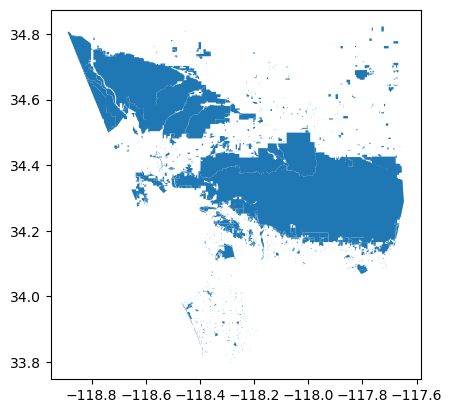

In [63]:
parks_d2d5.plot()

Narrow down the variables again for this parks_d2d5 set. Keeping the same name of the dataset.

In [64]:
parks_d2d5 = parks_d2d5[['FIPS','Join_Count','DIST_SUP', 'CITY_NAME','UNINCORP_NAME','JURISDICTION','UNIT_ID','PARK_NAME','ACCESS_TYP',
            'RPT_ACRES','GIS_ACRES','AGNCY_NAME','AGNCY_TYP', 'COGP_TYP','AMEN_RPT','PRKINF_CND','AM_OPNSP','AM_TRLS',
            'TOTAL_GOOD','TOTAL_FAIR', 'TOTAL_POOR','TYPE','CENTER_LAT','CENTER_LON','Shape__Area', 'Shape__Length','geometry']].copy()

In [65]:
parks_d2d5.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FIPS           1529 non-null   object  
 1   Join_Count     1529 non-null   int64   
 2   DIST_SUP       1529 non-null   int64   
 3   CITY_NAME      1142 non-null   object  
 4   UNINCORP_NAME  418 non-null    object  
 5   JURISDICTION   1529 non-null   object  
 6   UNIT_ID        1529 non-null   float64 
 7   PARK_NAME      1529 non-null   object  
 8   ACCESS_TYP     1529 non-null   object  
 9   RPT_ACRES      1529 non-null   float64 
 10  GIS_ACRES      1529 non-null   float64 
 11  AGNCY_NAME     1529 non-null   object  
 12  AGNCY_TYP      1529 non-null   object  
 13  COGP_TYP       1529 non-null   object  
 14  AMEN_RPT       1528 non-null   object  
 15  PRKINF_CND     1527 non-null   object  
 16  AM_OPNSP       1527 non-null   object  
 17  AM_TRLS        1527 non-n

## Descriptive Bar Charts of Parks in D2 and D5 (1 bad, 5 better)

I don't know this parks dataset so well, so I'm going to find the unique value counts of several columns, especially the 5 different types.

In [13]:
# get the counts of parks by all these various "types". 
#The LA County description of the'NDS_AN_TYP' column = "Type of park according to needs analysis"

counts_parkaccesstype = parks_d2d5.groupby(['DIST_SUP','ACCESS_TYP']).size().reset_index(name='counts')
counts_parkagytype = parks_d2d5.groupby(['DIST_SUP','AGNCY_TYP']).size().reset_index(name='counts')
counts_parkcogptype = parks_d2d5.groupby(['DIST_SUP','COGP_TYP']).size().reset_index(name='counts')
counts_parkneedtype = parks_d2d5.groupby(['DIST_SUP','NDS_AN_TYP']).size().reset_index(name='counts')
counts_parktype = parks_d2d5.groupby(['DIST_SUP','TYPE']).size().reset_index(name='counts')

#i want to stick in a sortby but not sure where to put it
#.sort_values(['DIST_SUP', 'NDS_AN_TYP'], ascending=(True, False))

In [14]:
counts_parkaccesstype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DIST_SUP    7 non-null      int64 
 1   ACCESS_TYP  7 non-null      object
 2   counts      7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 300.0+ bytes


Bring in plotly!

In [15]:
# for interactive plots
import plotly.express as px

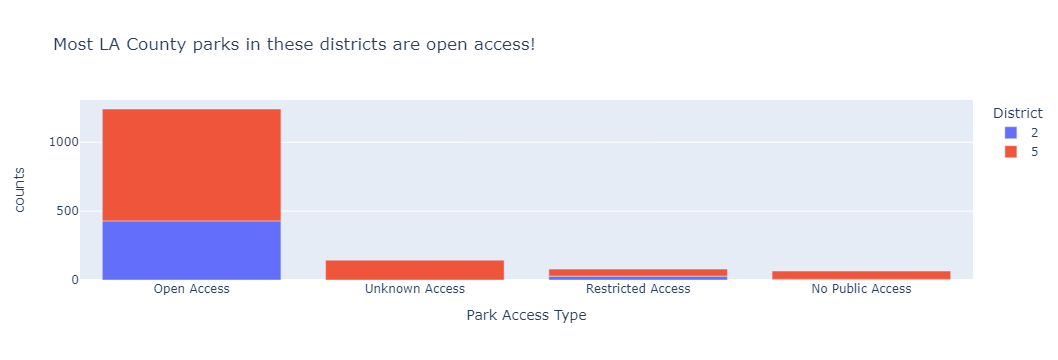

In [17]:
#make DIST_SUP a string for discrete colors on the legend
counts_parkaccesstype["DIST_SUP"] = counts_parkaccesstype["DIST_SUP"].astype(str)

fig = px.bar(counts_parkaccesstype, x='ACCESS_TYP', y='counts',  color='DIST_SUP',
             labels={
                     'ACCESS_TYP': 'Park Access Type',
                     'DIST_SUP': 'District'
                 }, #rename the titles
             title = 'Most LA County parks in these districts are open access!')

fig.update_layout(xaxis={'categoryorder':'total descending'}) #sort the bar chart from biggest to smallest
fig.show()

Woohoo, this is so much nicer! Now to do this for the other 4 types datasets I made...

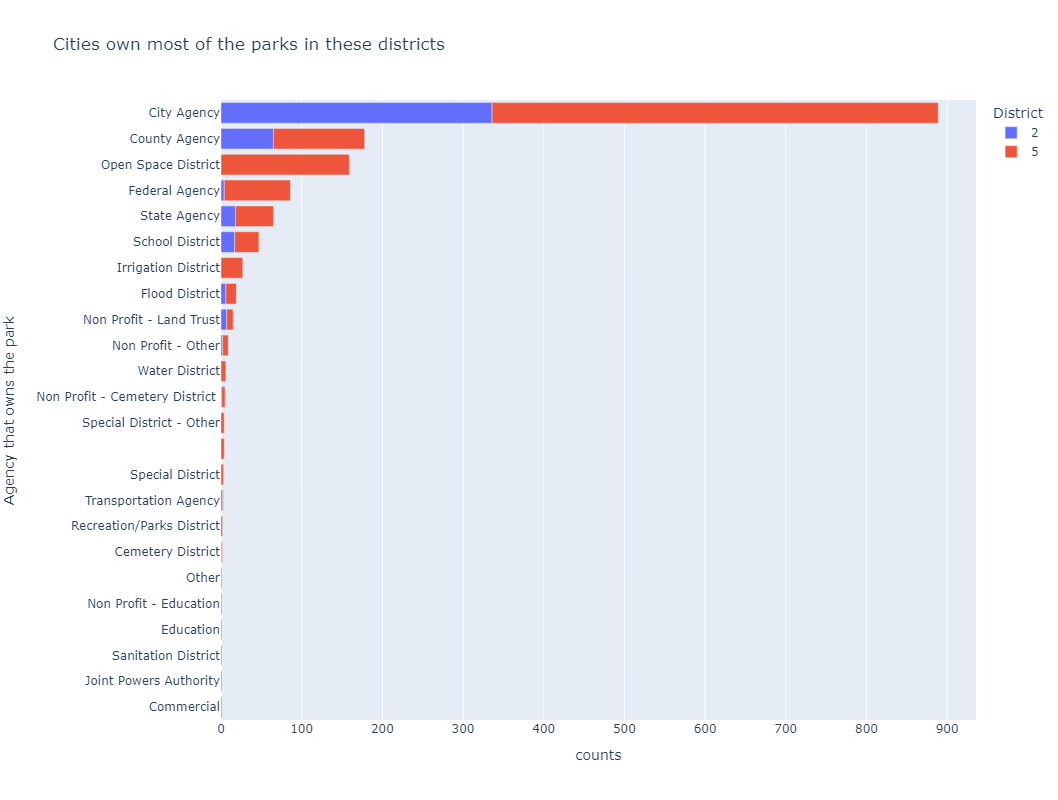

In [48]:
#make DIST_SUP a string for discrete colors
counts_parkagytype['DIST_SUP'] = counts_parkagytype['DIST_SUP'].astype(str)

fig = px.bar(counts_parkagytype, y='AGNCY_TYP', x='counts',  color='DIST_SUP', orientation = 'h',
             labels={
                     'AGNCY_TYP': 'Agency that owns the park',
                     'DIST_SUP': 'District'
                 }, #rename the titles
             title = 'Cities own most of the parks in these districts')

fig.update_layout(yaxis={'categoryorder':'total ascending'}) #sort the bar chart from biggest to smallest
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
) #to un-squish the chart per the internet
fig.show()

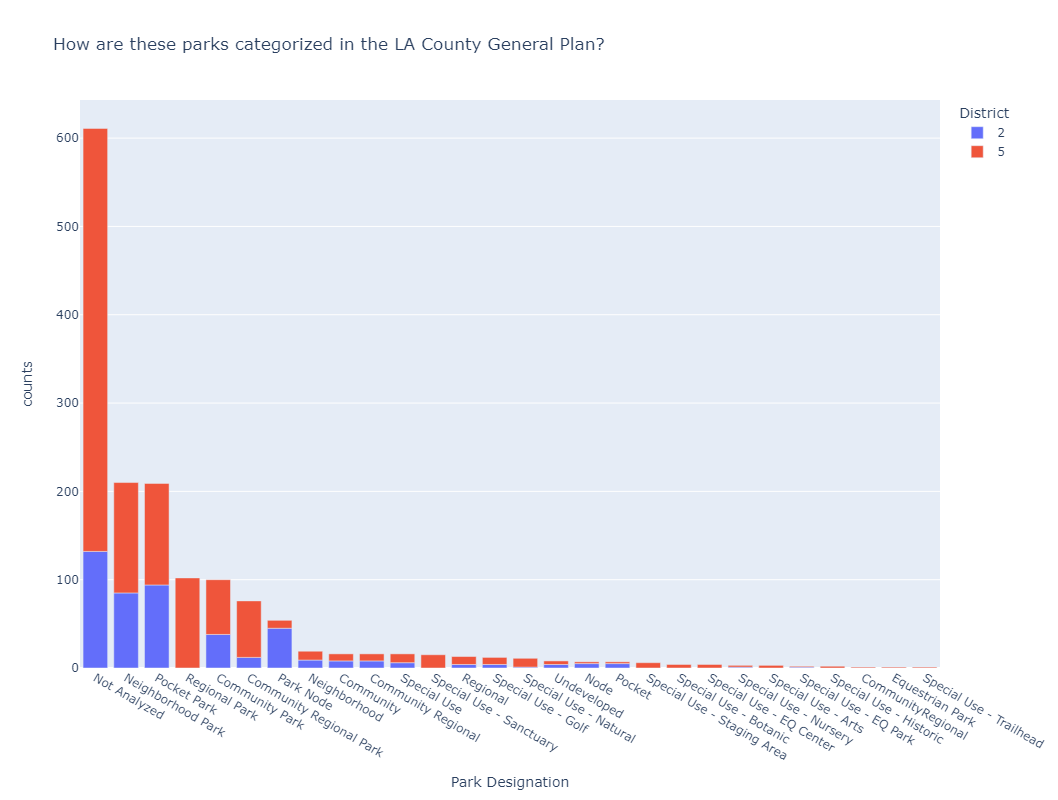

In [56]:
#make DIST_SUP a string for discrete colors
counts_parkcogptype['DIST_SUP'] = counts_parkcogptype['DIST_SUP'].astype(str)

fig = px.bar(counts_parkcogptype, x='COGP_TYP', y='counts',  color='DIST_SUP',
             labels={
                     'COGP_TYP': 'Park Designation',
                     'DIST_SUP': 'District'
                 }, #rename the titles
             title = 'How are these parks categorized in the LA County General Plan?')

fig.update_layout(xaxis={'categoryorder':'total descending'}) #sort the bar chart from biggest to smallest

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
) #to un-squish the chart per the internet

fig.show()

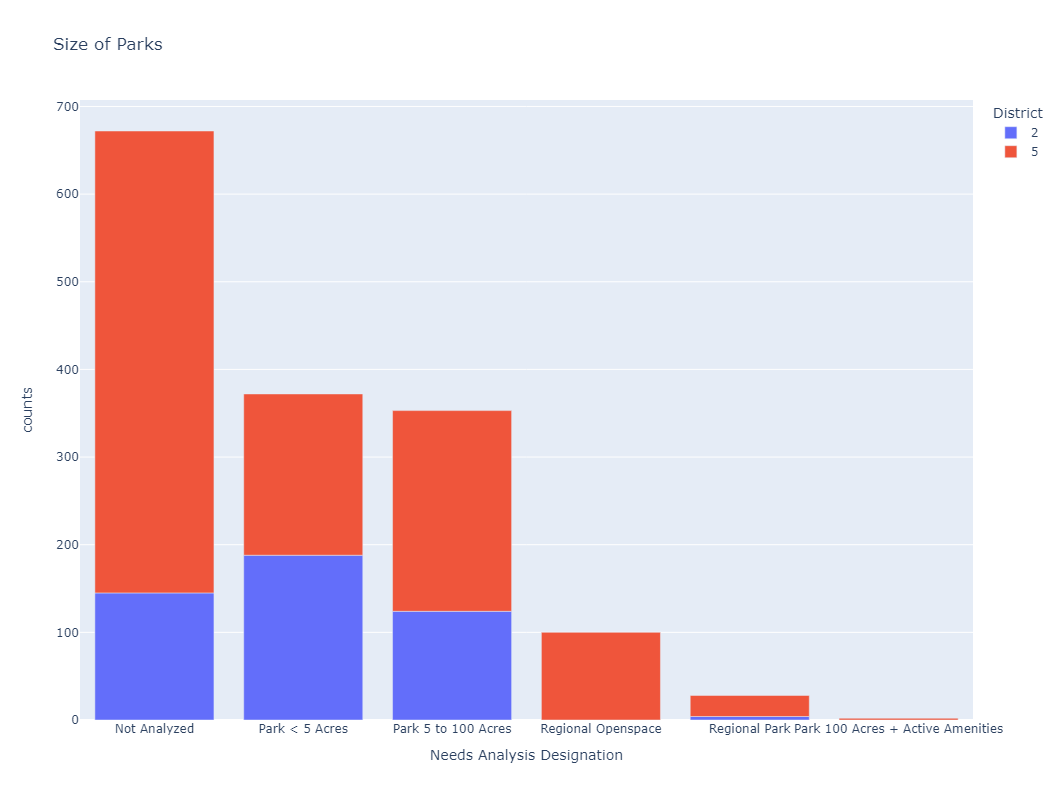

In [60]:
#make DIST_SUP a string for discrete colors
counts_parkneedtype['DIST_SUP'] = counts_parkneedtype['DIST_SUP'].astype(str)

fig = px.bar(counts_parkneedtype, x='NDS_AN_TYP', y='counts',  color='DIST_SUP',
             labels={
                     'NDS_AN_TYP': 'Needs Analysis Designation',
                     'DIST_SUP': 'District'
                 }, #rename the titles
             title = 'Size of Parks')

fig.update_layout(xaxis={'categoryorder':'total descending'}) #sort the bar chart from biggest to smallest

fig.update_layout(
    autosize=False,
    height=800,
) #to un-squish the chart per the internet

fig.show()

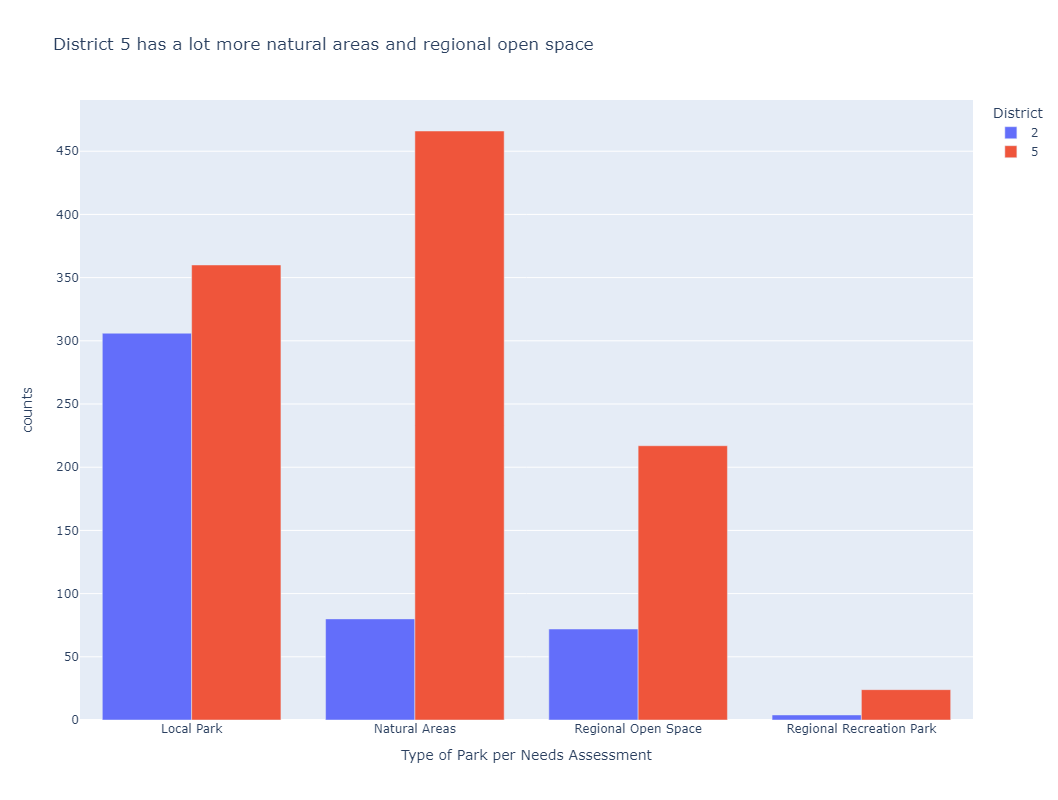

In [76]:
#make DIST_SUP a string for discrete colors
counts_parktype['DIST_SUP'] = counts_parktype['DIST_SUP'].astype(str)

fig = px.bar(counts_parktype, x='TYPE', y='counts',  color='DIST_SUP',
             labels={
                     'TYPE': 'Type of Park per Needs Assessment',
                     'DIST_SUP': 'District'
                 }, #rename the titles
             title = 'District 5 has a lot more natural areas and regional open space')

fig.update_layout(barmode='group') #don't stack d2 and d5

fig.update_layout(
    autosize=False,
    height=800,
) #to un-squish the chart per the internet

fig.show()

Doing some more exploration of the parks data...what's this PRKINF_CND column about Park Infrastructure Condition?

In [18]:
condition = parks_d2d5.groupby(['DIST_SUP','PRKINF_CND']).size().reset_index(name='counts')

In [19]:
condition2 = condition[condition['PRKINF_CND'].isin(['Good', 'Fair', 'Poor'])] #remove if condition is not reported (162 in D2, 709 in D5)

In [20]:
condition2

DIST_SUP PRKINF_CND  counts
0         2       Fair     136
1         2       Good     106
3         2       Poor      57
4         5       Fair     168
5         5       Good     171
7         5       Poor      18

/tmp/ipykernel_115/1193551216.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



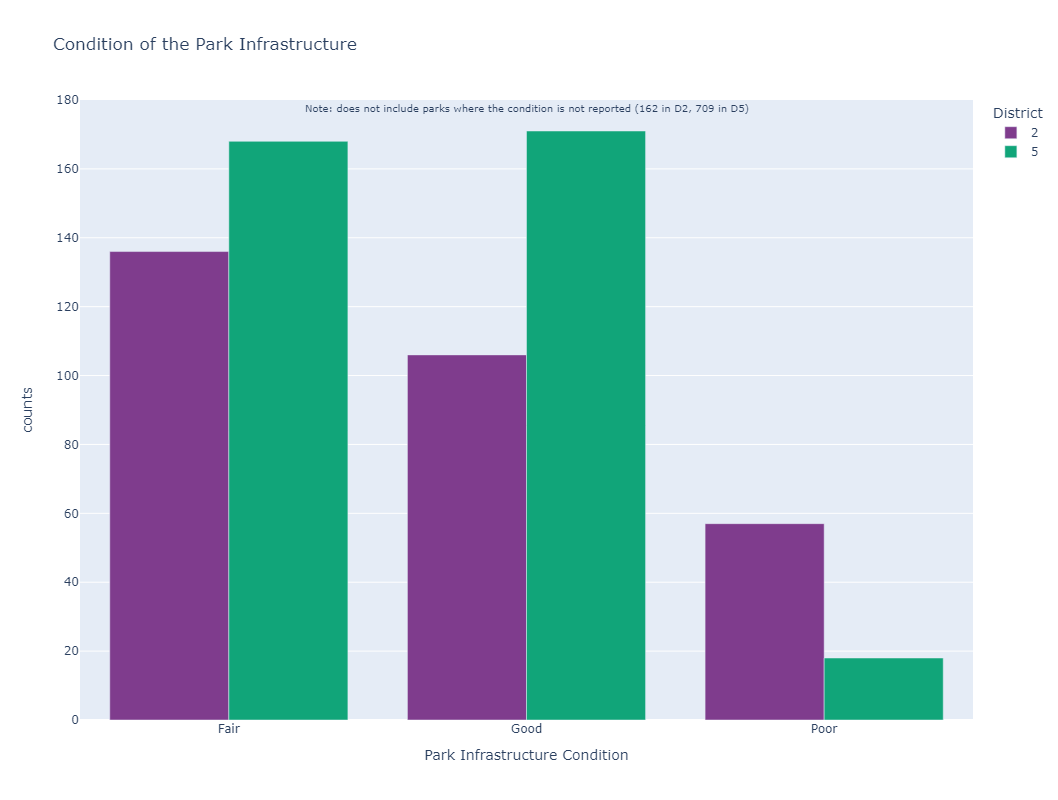

In [103]:
#make DIST_SUP a string for discrete colors
condition2['DIST_SUP'] = condition2['DIST_SUP'].astype(str)

fig = px.bar(condition2, x='PRKINF_CND', y='counts',  color='DIST_SUP',
             color_discrete_sequence=px.colors.qualitative.Bold, #change the colors to a new colorway
             labels={
                     'PRKINF_CND': 'Park Infrastructure Condition',
                     'DIST_SUP': 'District'
                 }, #rename the titles
             title = 'Condition of the Park Infrastructure')

fig.update_layout(barmode='group') #don't stack d2 and d5, make them separate columns

fig.update_layout(
    autosize=False,
    height=800,
) #to un-squish the chart per the internet

fig.add_annotation(
    showarrow=False,
    text='Note: does not include parks where the condition is not reported (162 in D2, 709 in D5)',
    font=dict(size=10), 
    xref='x domain',
    yref='y domain',
    y=1,
    ) #add a footnote

fig.show()

## Exploring and  cleaning the parks_d2d5 dataset

Upon exploring this data, I wanted to make a new column for restrooms (RSTRM) as yes or no. I found this code on **[the Internet](https://sparkbyexamples.com/pandas/pandas-create-conditional-column-in-dataframe/)**. However, after conducting further analysis, I discovered that restrooms are considered amenities and are counted within TOTAL_GOOD, TOTAL_FAIR, AND TOTAL_POOR.

In [13]:
#this code is unnecessary since restrooms is part of the total amenities count
#parks_d2d5['RESTROOM_EXISTS'] = ['No' if x == 0.0 else 'Yes' 
#                                 for x in parks_d2d5['RSTRM']]

## Initial Park Score from Miles

I'm taking the park score analysis and working off Miles' code for Week 7 from the Midterm_Cleaned.ipynb.

My groupmate Miles figured out how to make a "score" for parks' amenities based on the TOTAL_GOOD, TOTAL_FAIR, and TOTAL_POOR columns. Good is worth 1 point, Fair is worth 0.5, and Poor is worth 0.

The amenities that LA County counted are tennis courts, basketball courts, baseball fields, soccer fields, multi-purpose fields, fitness zones, skateparks, picnic shelters, playgrounds, pools, splash pads, dog parks, gymnasiums, commmunity centers, senior centers, and restrooms.re's that code:

In [66]:
parks_d2d5['Score'] = (parks_d2d5['TOTAL_GOOD'] + 
                       (parks_d2d5['TOTAL_FAIR']*0.5)) / (parks_d2d5['TOTAL_GOOD'] + parks_d2d5['TOTAL_FAIR'] + parks_d2d5['TOTAL_POOR'])
parks_d2d5['Score'].fillna(0, inplace = True)

In [67]:
#check
parks_d2d5[['PARK_NAME', 'AMEN_RPT','TOTAL_GOOD', 'TOTAL_FAIR', 'TOTAL_POOR', 'Score']].sample(5)

PARK_NAME AMEN_RPT  TOTAL_GOOD  \
148  Unnamed site - Mountains Recreation and Conser...       No         0.0   
916                             118th Street Mini Park      Yes         1.0   
131  Unnamed site - Mountains Recreation and Conser...       No         0.0   
973                                    Candy Cane Park      Yes         1.0   
507                        Marshall Canyon Golf Course       No         0.0   

     TOTAL_FAIR  TOTAL_POOR  Score  
148         0.0         0.0    0.0  
916         0.0         0.0    1.0  
131         0.0         0.0    0.0  
973         0.0         0.0    1.0  
507         0.0         0.0    0.0

There are a lot of columns, so I found some code on **[the internet](https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe)** that lets them all be displayed instead of squishing them.

Checking and expecting that all rows with AMEN_RPT = No (no amenities reported) means that they won't have a Park Score.

In [68]:
#use this code to look at ALL the columns
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(parks_d2d5[(parks_d2d5['AMEN_RPT'] == 'No') & (parks_d2d5['Score'] > 0)])

FIPS  Join_Count  DIST_SUP CITY_NAME        UNINCORP_NAME  \
903  06037600303           1         2       NaN  W ATHENS - WESTMONT   

            JURISDICTION   UNIT_ID            PARK_NAME   ACCESS_TYP  \
903  UNINCORPORATED AREA  100110.0  Woodcrest Play Park  Open Access   

     RPT_ACRES  GIS_ACRES              AGNCY_NAME      AGNCY_TYP COGP_TYP  \
903       0.08   0.078948  Los Angeles, County of  County Agency   Pocket   

    AMEN_RPT PRKINF_CND AM_OPNSP AM_TRLS  TOTAL_GOOD  TOTAL_FAIR  TOTAL_POOR  \
903       No       None     None    None         2.0         0.0         0.0   

           TYPE  CENTER_LAT  CENTER_LON  Shape__Area  Shape__Length  \
903  Local Park   33.939864 -118.299867  3438.975586     362.013666   

                                              geometry  Score  
903  POLYGON ((-118.29978 33.93974, -118.29990 33.9...    1.0

But there is one anomaly, Woodcrest Play Park. **We'll hard recode this singular row so that it doesn't get lost in the shuffle.**

In [69]:
parks_d2d5.loc[parks_d2d5['PARK_NAME'] == 'Woodcrest Play Park', 'AMEN_RPT'] = 'Yes'

Okay, so we've identified that one issue with our Park Score  is that parks with AMEN_RPT = No (no amenities reported) currently all have a score of 0. Let's see if we can find similarities so we can potentially build a different metric for them.



In [70]:
parks_d2d5.groupby(['TYPE', 'AMEN_RPT']).size()

TYPE                      AMEN_RPT
Local Park                No           18
                          Yes         648
Natural Areas             No          545
Regional Open Space       No          288
                          Yes           1
Regional Recreation Park  No            1
                          Yes          27
dtype: int64

Seems that all TYPE = 'Natural Areas' are not included in the amenities report. Most Regional Open Space aren't either (1 exception out of 289). What else do these parks have in common that we can build a score from?

In [71]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
 display(parks_d2d5[(parks_d2d5["TYPE"] == "Natural Areas") | (parks_d2d5["TYPE"] == "Regional Open Space")].sample(3))

FIPS  Join_Count  DIST_SUP    CITY_NAME UNINCORP_NAME  \
509  06037400209           1         5     LA VERNE           NaN   
122  06037143700           2         5  LOS ANGELES           NaN   
15   06037400404           1         5     GLENDORA           NaN   

          JURISDICTION  UNIT_ID                                  PARK_NAME  \
509  INCORPORATED CITY   6781.0                Marshall Canyon Golf Course   
122  INCORPORATED CITY  12455.0  Los Angeles Department of Water and Power   
15   INCORPORATED CITY  17353.0                    Angeles National Forest   

           ACCESS_TYP      RPT_ACRES      GIS_ACRES  \
509       Open Access     156.279324     156.279324   
122  No Public Access     209.562500     209.562500   
15        Open Access  642078.182000  641990.507981   

                       AGNCY_NAME       AGNCY_TYP            COGP_TYP  \
509        Los Angeles, County of   County Agency  Special Use - Golf   
122          Los Angeles, City of     City Agency        Not Analyzed   
15   United States Forest Service  Federal Agency        Not Analyzed   

    AMEN_RPT    PRKINF_CND      AM_OPNSP       AM_TRLS  TOTAL_GOOD  \
509       No  Not Reported  Not Reported  Not Reported         0.0   
122       No  Not Reported  Not Reported  Not Reported         0.0   
15        No  Not Reported  Not Reported  Not Reported         0.0   

     TOTAL_FAIR  TOTAL_POOR                 TYPE  CENTER_LAT  CENTER_LON  \
509         0.0         0.0  Regional Open Space   34.147513 -117.750361   
122         0.0         0.0        Natural Areas   34.128848 -118.335956   
15          0.0         0.0        Natural Areas   34.414216 -118.177686   

      Shape__Area  Shape__Length  \
509  6.807499e+06   1.647326e+04   
122  9.128506e+06   5.635851e+04   
15   2.796477e+10   5.306825e+06   

                                              geometry  Score  
509  MULTIPOLYGON (((-117.75355 34.14367, -117.7530...    0.0  
122  MULTIPOLYGON (((-118.34218 34.12072, -118.3424...    0.0  
15   MULTIPOLYGON (((-117.83978 34.16505, -117.8397...    0.0

Quite honestly, it doesn't seem like there is any further data we can leverage to build a Park Score for those without amenities. We still want to be able to map this data, but not confuse it with parks that actually have a Park Score of 0. So we will set these AMEN_RPT = No Parks to -1.  

In [72]:
parks_d2d5.loc[parks_d2d5['AMEN_RPT'] == 'No', 'Score'] = -1

In [73]:
#check that 852 rows were recoded - yes!
parks_d2d5.groupby(['AMEN_RPT', 'Score']).size()

AMEN_RPT  Score    
No        -1.000000    852
Yes        0.000000     79
           0.115385      2
           0.125000      1
           0.142857      1
                      ... 
           0.944444      2
           0.950000      1
           0.954545      6
           0.979167      4
           1.000000    128
Length: 106, dtype: int64

## Filter: only keep parks that are Open Access

There's a column for the parks' access type, which are Open Access (1241 rows), Unknown Access (144), Restricted Access (79), No Public Access (65). I got these numbers from ```parks_d2d5.value_counts("ACCESS_TYP")```.

We're only going to keep Open Access in our new dataset called **open_parks_d2d5**, since we know for sure these are available to the public.

*(Side note: when I ran value_counts on Unknown Access, most of these rows have a Park Name of 'Unnamed site - Mountains Recreation and Conservation Authority'.)*

In [61]:
open_parks_d2d5 = parks_d2d5[parks_d2d5['ACCESS_TYP']=='Open Access'] #should be 1241
open_parks_d2d5.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1241 entries, 0 to 1528
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FIPS           1241 non-null   object  
 1   Join_Count     1241 non-null   int64   
 2   DIST_SUP       1241 non-null   int64   
 3   CITY_NAME      997 non-null    object  
 4   UNINCORP_NAME  272 non-null    object  
 5   JURISDICTION   1241 non-null   object  
 6   UNIT_ID        1241 non-null   float64 
 7   PARK_NAME      1241 non-null   object  
 8   ACCESS_TYP     1241 non-null   object  
 9   RPT_ACRES      1241 non-null   float64 
 10  GIS_ACRES      1241 non-null   float64 
 11  AGNCY_NAME     1241 non-null   object  
 12  AGNCY_TYP      1241 non-null   object  
 13  COGP_TYP       1241 non-null   object  
 14  AMEN_RPT       1240 non-null   object  
 15  PRKINF_CND     1239 non-null   object  
 16  AM_OPNSP       1239 non-null   object  
 17  AM_TRLS        1239 non-null  

## Make new column denoting cemeteries, golf courses, and parkways
In past weeks of analysis, we stumbled upon the fact that some cemeteries, golf courses, and parkways/greenbelts (strips of green grass along a road, sometimes with a walking path) are considered parks. We would like to add a column that denotes this.

First, I looked at the data pretty extensively using variations of this code: ```with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(parks_d2d5[parks_d2d5['PARK_NAME'].str.contains('Parkway|Greenbelt'))]) ```

Then, I defined a if-else function and applied to a new column called **CEMETERY_GOLF_ETC**. Kind of a hodge podge.

In [77]:
# this code is from the internet
def assign(park_name):
    if 'Cemetery' in park_name:
        return 'Cemetery'
    elif 'Golf' in park_name:
        return 'Golf'
    elif 'Parkway' in park_name or 'Greenbelt' in park_name:
        return 'Parkway'
    else:
        return 'None'

open_parks_d2d5['CEMETERY_GOLF_ETC'] = open_parks_d2d5['PARK_NAME'].apply(assign)


In [80]:
# check for reasonability - good
open_parks_d2d5.value_counts('CEMETERY_GOLF_ETC')

CEMETERY_GOLF_ETC
None        1183
Parkway       33
Golf          20
Cemetery       5
Name: count, dtype: int64

In [93]:
open_parks_d2d5[open_parks_d2d5['CEMETERY_GOLF_ETC']!='None'].sample(3)

FIPS  Join_Count  DIST_SUP        CITY_NAME  \
980   06037620904           1         2  MANHATTAN BEACH   
1205  06037910501           1         5         PALMDALE   
1242  06037910810           1         5              NaN   

             UNINCORP_NAME         JURISDICTION  UNIT_ID  \
980                    NaN    INCORPORATED CITY   6114.0   
1205                   NaN    INCORPORATED CITY  46114.0   
1242  SANTA CLARITA VALLEY  UNINCORPORATED AREA  46243.0   

                            PARK_NAME   ACCESS_TYP  RPT_ACRES  ...  \
980                  Veterans Parkway  Open Access     21.640  ...   
1205  Dr. Robert C. St. Clair Parkway  Open Access      8.719  ...   
1242     Eastern Greenbelt Open Space  Open Access   1196.153  ...   

      TOTAL_POOR                 TYPE CENTER_LAT  CENTER_LON   Shape__Area  \
980          0.0           Local Park  33.890097 -118.404263  9.427027e+05   
1205         0.0  Regional Open Space  34.580997 -118.117143  3.797339e+05   
1242         0.0        Natural Areas  34.449003 -118.348339  5.209776e+07   

     Shape__Length                                           geometry Score  \
980   23269.613160  MULTIPOLYGON (((-118.40180 33.87711, -118.4019...   0.5   
1205   8740.579297  MULTIPOLYGON (((-118.11622 34.57602, -118.1161...  -1.0   
1242  65551.373367  MULTIPOLYGON (((-118.36056 34.43457, -118.3605...  -1.0   

      CEMETERY_GOLF_ETC                                              Color  
980             Parkway  (0.7098039215686275, 0.8117647058823529, 0.419...  
1205            Parkway  (0.7098039215686275, 0.8117647058823529, 0.419...  
1242            Parkway  (0.7098039215686275, 0.8117647058823529, 0.419...  

[3 rows x 46 columns]

## Miles' code - haven't looked at this yet

### Step 7: Make some maps

Alter this code from Miles for my names!

In [ ]:
Parks1 = Parks.to_crs(epsg=4269)
Parks1.crs
# Match the CRS's

In [ ]:
columns_to_keep_parks = ['Score','geometry','RPT_ACRES','PARK_NAME'] # Clean the datasheet
Parks1 = Parks1[columns_to_keep_parks] 
Parks1.head(10)

Miles' map below.

In [ ]:
ParkScoreMap = Parks.plot(figsize=(12, 10), #i may need to change Parks from Miles' code
                column='Score',
                legend=True,
                scheme='equal_interval',
                legend_kwds={'title': 'LA county & Park scores',  # Set the title of the legend
                             'fontsize': 14,         # Set the font size of the legend
                             'shadow': True,         # Enable shadow for the legend
                             'loc': 'lower right'},
                cmap='YlGnBu')

ParkScoreMap.set_title('Park Rating in Los Angeles County',fontsize=16)
ParkScoreMap.set_xticklabels([])
ParkScoreMap.set_yticklabels([])
# Save the plot to an image file
plt.savefig('parks_score_plot.png', bbox_inches='tight')

In [ ]:
o = folium.Map(location=[34.2, -118.2], zoom_start=10, tiles='CartoDB positron', attribution='CartoDB')

folium.Choropleth(
    geo_data=Parks1,  # GeoJSON data or GeoDataFrame is required here, set to None for now
    data=Parks1,  # Use your DataFrame Parks2 with the sample data
    columns=['PARK_NAME', 'Score'],  # Specify the columns for park names and scores
    key_on='feature.properties.PARK_NAME',  # Specify the key to match park names in the geo_data
    fill_color='YlGnBu',  # Color scale
    fill_opacity=0.8,
    line_opacity=0.2
).add_to(o)
o

In [ ]:
o.save('Parkscore.html') 

## Got distracted and made a map - MOVE DOWN

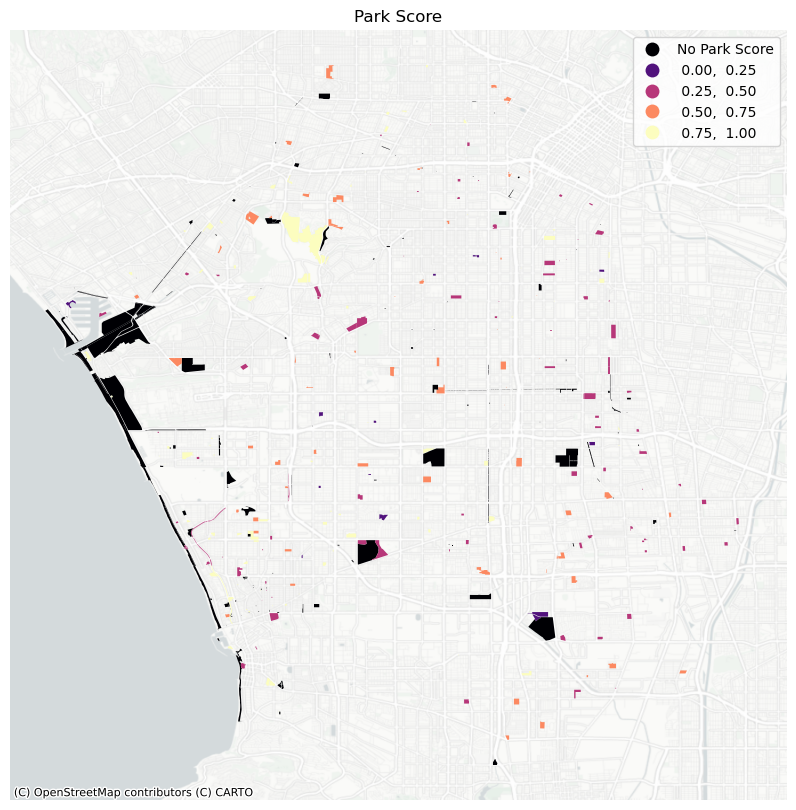

In [51]:
#quick map
ax = parks_d2d5[parks_d2d5['DIST_SUP']==2].plot(figsize=(12,10),
                            column='Score',
                 legend=True, 
                scheme='user_defined', classification_kwds={'bins':[0, 0.25, 0.5, 0.75, 1]}, #make my own bins on the legend
                cmap='magma') 

leg = ax.get_legend()
leg.get_texts()[0].set_text('No Park Score') #index 0 is -1 - set to say No Park Score

ax.set_title('Park Score')
ax.axis('off') 

ctx.add_basemap(ax,crs=parks_d2d5.crs, source=ctx.providers.CartoDB.PositronNoLabels) #add a basemap from the contextily library
#plt.savefig('D2_HH_Less_Than_14999_PCT.jpg') #some weird quirk where you have to save before you show the plot
plt.show()

## i don't think this really works for plotting a string variable

/tmp/ipykernel_110/3617567125.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20b', num_categories)  # Using tab20b colormap for variety


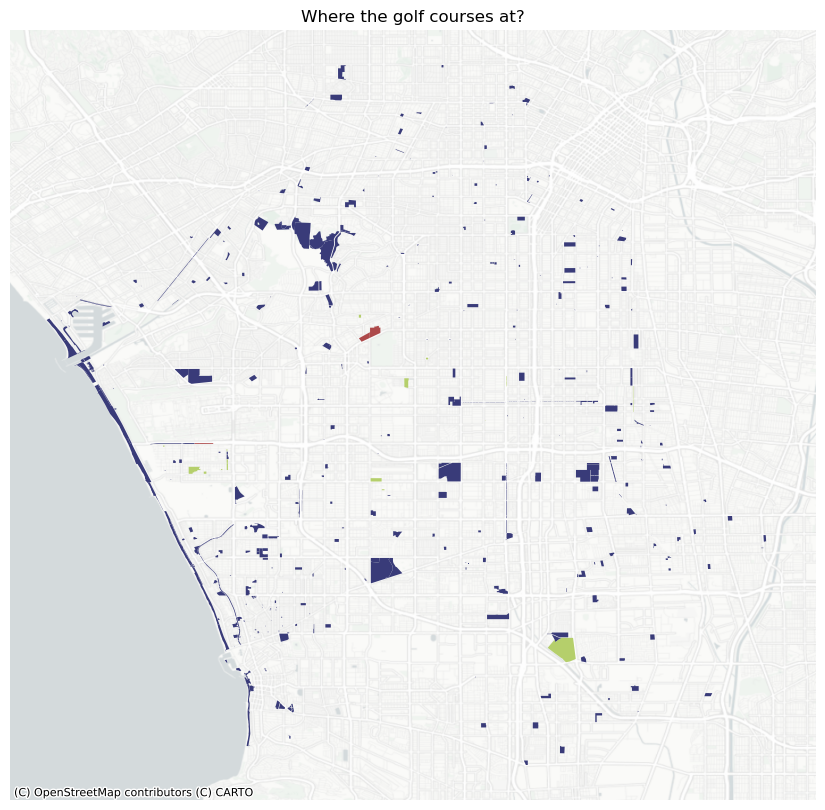

In [88]:
#plotting with a string variable - i don't really like this option

# Define a colormap that assigns a unique color to each unique string in 'CEMETERY_GOLF_ETC'
unique_categories = open_parks_d2d5['CEMETERY_GOLF_ETC'].unique()
num_categories = len(unique_categories)
color_map = plt.cm.get_cmap('tab20b', num_categories)  # Using tab20b colormap for variety

# Create a dictionary to map each category to a color
category_color_map = {category: color_map(i) for i, category in enumerate(unique_categories)}

# Plotting with colors mapped to categories
ax = open_parks_d2d5[open_parks_d2d5['DIST_SUP'] == 2].plot(figsize=(12,10),
                                                            color=[category_color_map[x] for x in open_parks_d2d5['CEMETERY_GOLF_ETC']],
                                                            legend=True)

ax.get_legend()
ax.set_title('Where the golf courses at?')
ax.axis('off')

# Adding a basemap from the contextily library
ctx.add_basemap(ax, crs=open_parks_d2d5.crs, source=ctx.providers.CartoDB.PositronNoLabels)

plt.show()
